In [5]:
%matplotlib inline
from __future__ import division

import pandas as pd
import numpy as np

from biom import load_table

import matplotlib.pyplot as plt

Download the open reference OTU table.

In [2]:
!scp barnacle:/home/yovazquezbaeza/research/suchodolski-dogs/open-ref-otus/otu_table_mc2_w_tax.biom  counts/open-ref-table.biom

/home/yovazquezbaeza/.bashrc: line 34: module: command not found
discarding /home/yovazquezbaeza/miniconda/bin from PATH
prepending /home/yovazquezbaeza/miniconda/envs/qiime/bin to PATH
otu_table_mc2_w_tax.biom                      100% 9160KB   2.2MB/s   00:04    


In [3]:
!biom summarize-table -i counts/open-ref-table.biom -o counts/open-ref-table-summary.txt

Load the summaries from split libraries and the OTU table to get a proportion of the sequences assigned to an OTU. Note that the original output formats are not Pandas friendly, therefore I used vim to trimmed out the lines that were not needed at all.

In [6]:
sl = pd.read_csv('counts/split_library_log.txt', sep='\t', index_col='#SampleID')
ot = pd.read_csv('counts/table-summary.txt', sep='\t', index_col='#SampleID')
ot_open = pd.read_csv('counts/open-ref-table-summary.txt', sep='\t', index_col='#SampleID')

In [7]:
tot = pd.DataFrame(index=sl.index, columns=['Sequences', 'OTU_Counts', 'OTU_Counts_open'])

In [28]:
tot['Sequences'] = sl.Count
tot['OTU_Counts'] = ot.Count
tot['OTU_Counts_open'] = ot_open.Count

tot['Percent'] = np.divide(tot.OTU_Counts, tot.Sequences *1.0) * 100
tot['Percent_open'] = np.divide(tot.OTU_Counts_open, tot.Sequences *1.0) * 100

# Examine the percents of sequences assigned to an OTU, both for open and closed reference.

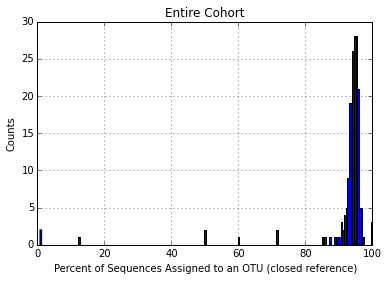

In [30]:
tot['Percent'].hist(bins=200)

plt.xlabel('Percent of Sequences Assigned to an OTU (closed reference)')
plt.ylabel('Counts')
plt.xlim([0, 100])

plt.title('Entire Cohort')

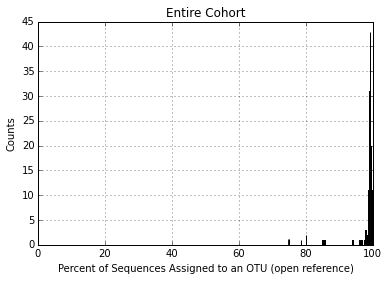

In [29]:
tot['Percent_open'].hist(bins=200)

plt.xlabel('Percent of Sequences Assigned to an OTU (open reference)')
plt.ylabel('Counts')
plt.xlim([0, 100])

plt.title('Entire Cohort')

# Look only at the samples that were used for analysis

Note that during our entire analysis we excluded the samples from the dogs that had accute hemorragic diarrhea. Also note that a few samples are dropped since they don't accrue the minimum of 15,000 sequences. All this can be summarized by looking at the core OTU table we used.

In [31]:
bt = load_table('otu_table.15000.no-diarrhea.biom')

sub = tot.loc[bt.ids('sample')].copy()

sub['Percent'] = np.divide(sub.OTU_Counts, sub.Sequences *1.0) * 100
sub['Percent_open'] = np.divide(sub.OTU_Counts_open, sub.Sequences *1.0) * 100

Now visualize this data.

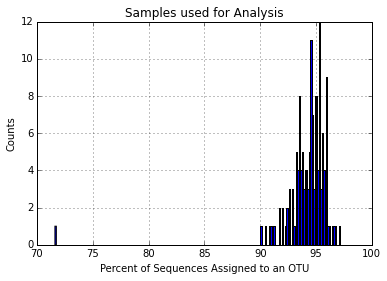

In [33]:
sub['Percent'].hist(bins=200)

plt.xlabel('Percent of Sequences Assigned to an OTU')
plt.ylabel('Counts')
plt.xlim([70, 100])
plt.title('Samples used for Analysis')

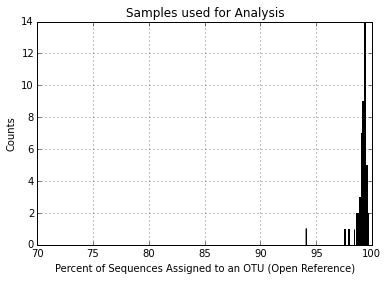

In [34]:
sub['Percent_open'].hist(bins=200)

plt.xlabel('Percent of Sequences Assigned to an OTU (Open Reference)')
plt.ylabel('Counts')
plt.xlim([70, 100])
plt.title('Samples used for Analysis')

In [35]:
sub.Percent.mean()

94.247970426585781

In [36]:
sub.Percent_open.mean()

99.143186791879018

This last bit is particularly revealing of the minor gains that we get from using the open reference OTU picking protocol. The mean percent of reads mapped to an OTU went from 94.2 % (in closed reference) to 99.14 % (in open reference). Furthermore in the original analysis performed in Gevers et al 2014, a closed reference OTU picking approach was used, therefore to directly compare co-occurrence networks between analyses would be incorrect.